# Capstone 3 - Sales Forecast
# 3.1 Data Wrangling

This project focuses on creating an effective sales forecasting model using one year of historical sales data of a UK based n online retail store. In this notebook, I'll handle the Data Wrangling process to prepare the available data for the subsequent phase, which involves conducting an Exploratory Data Analysis (EDA).

## Contents
- 3.1.1. [Loading the sales data](#3.1.1.Loadingthesalesdata)
- 3.1.2. [Categorical variables](#3.1.2.Categoricalvariables)
- 3.1.3. [Numeirical variables](#3.1.3.Numeiricalvariables)
- 3.1.4. [Conclusion](#3.1.4.Conclusion)

### 3.1.1. Loading the sales data <a id="3.1.1.Loadingthesalesdata"></a>

In [1]:
from pathlib import Path
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Download, unzip and load the data.

outer_zip_file_url = 'https://archive.ics.uci.edu/static/public/352/online+retail.zip' 

outer_zip_response = requests.get(outer_zip_file_url)
with open('online+retail.zip', 'wb') as f:
    f.write(outer_zip_response.content)
    
with zipfile.ZipFile('online+retail.zip', 'r') as zip_path:
    zip_path.extractall('outer_folder')
    
file_path = 'outer_folder/Online Retail.xlsx'


df  = pd.read_excel(file_path)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### 3.1.2. Categorical variables <a id="3.1.2.Categoricalvariables"></a>

In [6]:
df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [7]:
df['InvoiceNo'].nunique()

25900

In [8]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [9]:
df['Description'].nunique()

4223

In [10]:
df['CustomerID'] = df['CustomerID'].astype('str')
df['CustomerID'] = df['CustomerID'].str.replace( '.0', '')

In [11]:
df['CustomerID'] = df['CustomerID'].astype('object')

In [12]:
df['CustomerID'].value_counts()

CustomerID
nan      135080
17841      7983
14911      5903
14096      5128
12748      4642
          ...  
13270         1
17763         1
17291         1
15668         1
15562         1
Name: count, Length: 4373, dtype: int64

In [13]:
df['CustomerID'].nunique()

4373

In [14]:
df['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

In [15]:
df['StockCode'].nunique()

4070

In [16]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [17]:
df['Country'].nunique()

38

From my initial observations of the categorical variables, I can see that:

* There are a lot of records missing `CustomerID`, and a few missing `Description`.
* The data type of `CustomerID` was initially a float64, which needed to be converted into object type.

* In the `Country` records, 'European Community' is represented as a separate record, since it does not represent a country we could consider combining it with the 'unspecified' records.

### 3.1.3. Numeirical variables <a id="3.1.3.Numeiricalvariables"></a>

In [18]:
# Looking at Numerical ariables
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


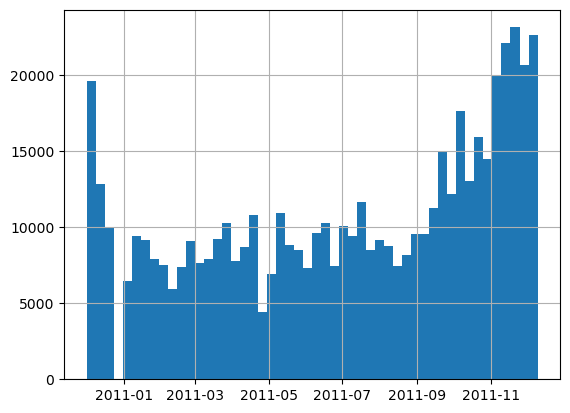

In [19]:
df['InvoiceDate'].hist(bins=50)
plt.show()

In [20]:
df['InvoiceDate'][(df['InvoiceDate'] >= '2010-12-24') & (df['InvoiceDate'] <= '2011-01-04')]


Series([], Name: InvoiceDate, dtype: datetime64[ns])

* This shows that there were no transactions recorded between Dec 24, 2010 and Jan 4, 2011 either due to the website being down or the transactions occured but were not recorded. 

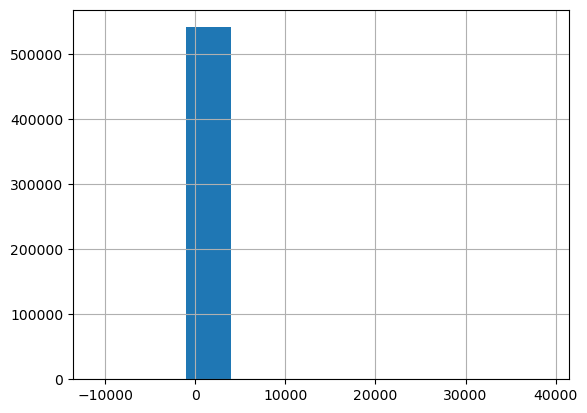

In [21]:
df['UnitPrice'].hist()
plt.show()

In [22]:
df[df['UnitPrice'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [23]:
df['UnitPrice'] = df['UnitPrice'][df['UnitPrice'] > 0 ]

* There are two transaction records with a negative `UnitPrice` value. The `Description` of these records implies that  transactions are 'adjusting for bad debts' and they may be entered to correct errors in accounting rather than being real transactions. Therefore, they were removed. 

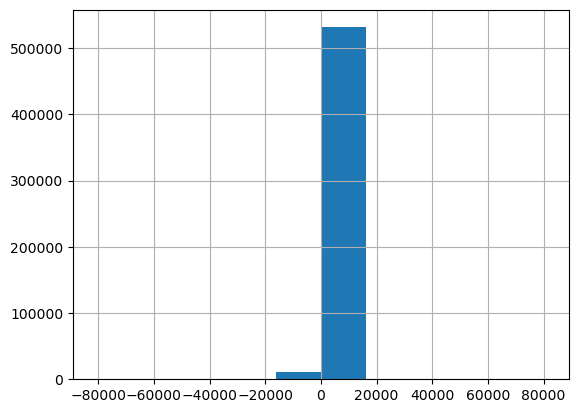

In [24]:
df['Quantity'].hist()
plt.show()

In [25]:
df[df['Quantity'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [26]:
print(df['StockCode'].apply(type).value_counts())

StockCode
<class 'int'>    487036
<class 'str'>     54873
Name: count, dtype: int64


In [27]:
df['StockCode'] = df['StockCode'].astype(str)

In [28]:
filtered = df[~df['StockCode'].str.isalpha()]
filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [29]:
filtered_df = filtered[filtered['StockCode'] != 'BANK CHARGES']
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [30]:
filtered_df['StockCode']= filtered_df['StockCode'].astype('object')
filtered_df['CustomerID'] = filtered_df['CustomerID'].astype('object')

There are few records with a negative `Quantity` which could indicate purchase returns. Thus the values will be kept in the data. 

In [31]:
#Saving cleaned data

filtered_df.to_csv('sales_cleaned_data.csv', index=False)

### 3.1.4. Conclusion <a id="3.1.4.Conclusion"></a>

The following points can be concluded from this notebook:

* There are a lot of records missing `CustomerID`, and a few missing `Description`. Since this timeseries forecast may not make ue of these variables, I'll make note and leave them as they are. 

* The data type of `CustomerID` was initially a float64, which needed to be converted into object type.

* In the `Country` records, 'European Community' is represented as a separate record, since it does not represent a country we could consider combining it with the 'unspecified' records.

* The histogram of `InvoiceDate` shows a gap in the data as there were no transactions recorded between Dec 24, 2010 and Jan 4, 2011 either due to the website being down or the transactions occured but were not recorded. 

* There are two transaction records with a negative `UnitPrice` value. The `Description` of these records implies that  transactions are 'adjusting for bad debts' i.e. they may be entered to correct errors in accounting rather than being real transactions. Therefore, they were removed. 


* There are few records with a negative `Quantity` which could indicate purchase returns. These the values will be kept in the data since they may be important in the analysis. 

* Both `Quantity` and `UnitPrice` are highly skewed i.e `Quantity` has a really high outliers on the upper and lower end and `UnitPrice`  has a really high outliers on the upper end that need to be looked at the the following EDA.

* The records are not all sales records, the data includes what could be returns, accounting adjustments, Amazon fees, shipping fees and so on. Therefore, I've filtered the data based on the `StockCode` to remove the non-transactional/accounting data. 